In [1]:
import xarray as xr

In [2]:
# OPENING A DATASET

# xarray dataset - container for data and associated metadata

# open_dataset command only reads metadata from the netCDF file - doesn't
# read any data variables until required by operations (this is what
# makes the method so efficient!)

# xr.Dataset object has methods for accessing coordinates, attributes
# and data.

era_Jan_2019 = xr.open_dataset('/g/data/rt52/era5/pressure-levels/monthly-averaged/t/2019/t_era5_moda_pl_20190101-20190131.nc')

In [3]:
era_Jan_2019
# Asterisk before coordinates indicates that they are also data variables.

<xarray.Dataset>
Dimensions:    (latitude: 721, level: 37, longitude: 1440, time: 1)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.75 -179.5 ... 179.25 179.5 179.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 2019-01-01
Data variables:
    t          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 pressure-levels monthly-averaged temperature 20190101-...
    history:      2020-11-05 15:23:02 UTC+1100 by era5_replication_tools-1.5....

In [4]:
# Data variables are saved in a dict-like structure called data_vars
# (dependence on coordinates included here).
era_Jan_2019.data_vars

Data variables:
    t        (time, level, latitude, longitude) float32 ...

In [5]:
# Can also loop over data variables.
for varname in era_Jan_2019:
    print(varname)

t


In [6]:
# Methods of accessing variables:
# Data variables are stored in xarray.DataArray with their own metadata
# (attributes) and their own associated coordinates.
era_Jan_2019['t']

<xarray.DataArray 't' (time: 1, level: 37, latitude: 721, longitude: 1440)>
[38414880 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.75 -179.5 ... 179.25 179.5 179.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 2019-01-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [7]:
# This is also an xarray.DataArray with its own atttributes that describe
# the data.
era_Jan_2019.t

<xarray.DataArray 't' (time: 1, level: 37, latitude: 721, longitude: 1440)>
[38414880 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.75 -179.5 ... 179.25 179.5 179.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 2019-01-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [8]:
# SUBSETTING
# xarray stores data internally as numpy arrays (can use numpy indexing).
temp = era_Jan_2019.t
temp

<xarray.DataArray 't' (time: 1, level: 37, latitude: 721, longitude: 1440)>
[38414880 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.75 -179.5 ... 179.25 179.5 179.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 2019-01-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [9]:
# This prints the dimensions of the array in which the temp variable is
# stored.
temp.shape

(1, 37, 721, 1440)

In [10]:
# This method allows for the selection of vectors, submatrices or single 
# values of temperature at some time, lat, lon, and altitude. 
# In the case of this dataset, there is only one time dimension as we 
# have extracted monthly-averaged values for just one month. 
temp[0, 0, 0, :]

<xarray.DataArray 't' (longitude: 1440)>
array([210.42317, 210.42317, 210.42317, ..., 210.42317, 210.42317, 210.42317],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.75 -179.5 ... 179.25 179.5 179.75
    latitude   float32 90.0
    level      int32 1
    time       datetime64[ns] 2019-01-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [11]:
# isel can be used to remove a dimension by selecting a single value for 
# it (selection equivalent to numpy indexing).
temp.isel(time=0)

<xarray.DataArray 't' (level: 37, latitude: 721, longitude: 1440)>
[38414880 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.75 -179.5 ... 179.25 179.5 179.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
    time       datetime64[ns] 2019-01-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [12]:
# Can also select by using .sel with coordinate values.
# This essentially forms a submatrix.
# The temperature values printed are in K. 
# This selection gives the average temperature around Sydney in Jan 2019.
temp.sel(longitude=slice(150, 152) ,latitude=slice(-32, -34), level=975, time='2019-01-01T00:00:00.000000000')\
# We could slice for the time dimension if it was larger.

<xarray.DataArray 't' (latitude: 9, longitude: 9)>
array([[301.84586, 301.69354, 301.5317 , 301.39084, 301.49554, 301.36987,
        300.70734, 299.84485, 299.05853],
       [301.50507, 301.36798, 301.05765, 300.6978 , 300.67685, 300.57977,
        300.04474, 299.32126, 298.5216 ],
       [301.25946, 301.05573, 300.62927, 300.09427, 299.83344, 299.60684,
        299.22797, 298.7539 , 297.99805],
       [300.92056, 300.5988 , 300.09235, 299.56686, 299.23178, 298.78625,
        298.33313, 298.0361 , 297.50302],
       [300.59308, 300.15137, 299.50214, 298.98425, 298.6454 , 297.94855,
        297.32025, 297.22504, 297.04608],
       [300.37604, 299.84293, 298.97665, 298.33313, 297.9333 , 297.16412,
        296.60626, 296.71097, 296.69385],
       [300.26752, 299.55734, 298.4626 , 297.6858 , 297.18887, 296.51108,
        296.20453, 296.39493, 296.34732],
       [300.1609 , 299.0985 , 297.86285, 297.07843, 296.5206 , 295.9989 ,
        295.92276, 296.07507, 295.9932 ],
       [299.80865, 298.59778, 297.47064, 296.59674, 295.8523 , 295.5115 ,
        295.65622, 295.76663, 295.69427]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 150.0 150.25 150.5 ... 151.5 151.75 152.0
  * latitude   (latitude) float32 -32.0 -32.25 -32.5 ... -33.5 -33.75 -34.0
    level      int32 975
    time       datetime64[ns] 2019-01-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [13]:
# Recall that Python is object-oriented, so operations can be chained 
# via the 'dot' command and performed sequentially.
temp.isel(time=0).sel(longitude=slice(150, 152) ,latitude=slice(-32, -34), level=975)
# Each of the above methods have different benefits - in some cases it is
# useful to explicitly select a date, in others it is more useful to 
# select directly by index.

<xarray.DataArray 't' (latitude: 9, longitude: 9)>
array([[301.84586, 301.69354, 301.5317 , 301.39084, 301.49554, 301.36987,
        300.70734, 299.84485, 299.05853],
       [301.50507, 301.36798, 301.05765, 300.6978 , 300.67685, 300.57977,
        300.04474, 299.32126, 298.5216 ],
       [301.25946, 301.05573, 300.62927, 300.09427, 299.83344, 299.60684,
        299.22797, 298.7539 , 297.99805],
       [300.92056, 300.5988 , 300.09235, 299.56686, 299.23178, 298.78625,
        298.33313, 298.0361 , 297.50302],
       [300.59308, 300.15137, 299.50214, 298.98425, 298.6454 , 297.94855,
        297.32025, 297.22504, 297.04608],
       [300.37604, 299.84293, 298.97665, 298.33313, 297.9333 , 297.16412,
        296.60626, 296.71097, 296.69385],
       [300.26752, 299.55734, 298.4626 , 297.6858 , 297.18887, 296.51108,
        296.20453, 296.39493, 296.34732],
       [300.1609 , 299.0985 , 297.86285, 297.07843, 296.5206 , 295.9989 ,
        295.92276, 296.07507, 295.9932 ],
       [299.80865, 298.59778, 297.47064, 296.59674, 295.8523 , 295.5115 ,
        295.65622, 295.76663, 295.69427]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 150.0 150.25 150.5 ... 151.5 151.75 152.0
  * latitude   (latitude) float32 -32.0 -32.25 -32.5 ... -33.5 -33.75 -34.0
    level      int32 975
    time       datetime64[ns] 2019-01-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [14]:
# We can use method='nearest' to find the average temperature closest
# to Sydney (as we can't exactly select Sydney).
temp[0, :, :, :].sel(latitude=-33.865143, longitude=151.2099, level=1000, method='nearest')

# Side note - find a maximum using (temp.level.max())


<xarray.DataArray 't' ()>
array(296.473, dtype=float32)
Coordinates:
    longitude  float32 151.25
    latitude   float32 -33.75
    level      int32 1000
    time       datetime64[ns] 2019-01-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

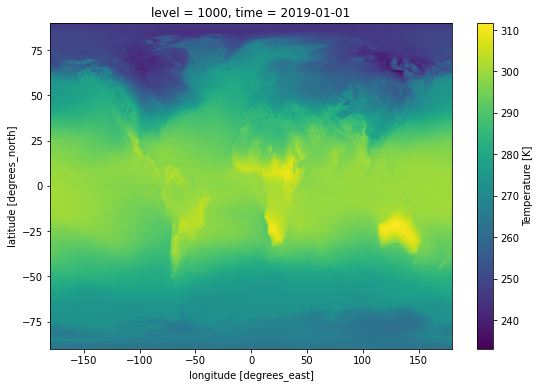

In [15]:
# PLOTTING
# This command allows plots to be displayed in Jupyter
%matplotlib inline
# Plot surface temperature (don't need to select time as it is 1D).
temp.sel(level=1000).plot(size=6)

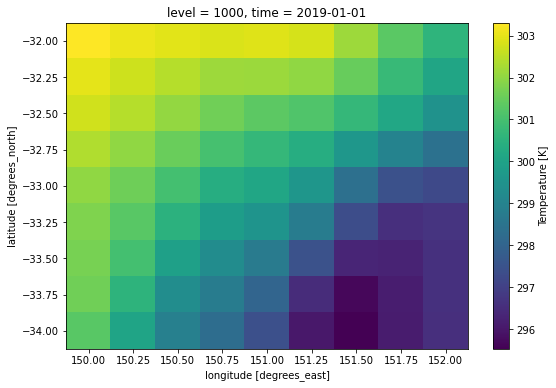

In [16]:
# Plot surface temperatures for a lat/lon slice!
temp.sel(longitude=slice(150, 152) ,latitude=slice(-32, -34), level=1000).plot(size=6)
# It appears hotter in Katoomba (inland).

(array([29., 64., 50., 39., 39., 28., 29., 23., 14.,  9.]),
 array([295.026  , 295.85422, 296.6824 , 297.51062, 298.33884, 299.16705,
        299.99524, 300.82346, 301.65167, 302.47986, 303.30807],
       dtype=float32),
 <BarContainer object of 10 artists>)

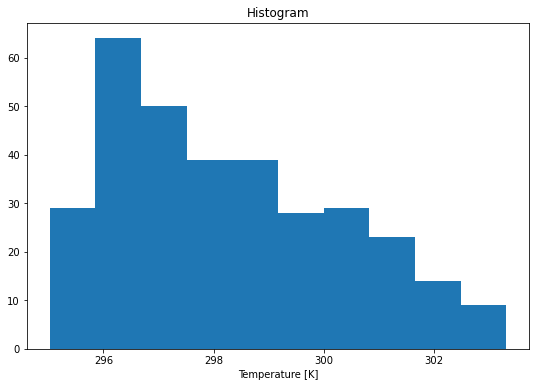

In [18]:
# xarray guesses the plot type based on the dimensionality. 
# Outputs a 2D histogram if given too many dimensions.
# Here, I am requesting a 4D plot with temp over a 3D slice, so a histogram
# is produced.
temp.sel(longitude=slice(150, 152) ,latitude=slice(-32, -34), level=slice(925,1000)).plot(size=6)

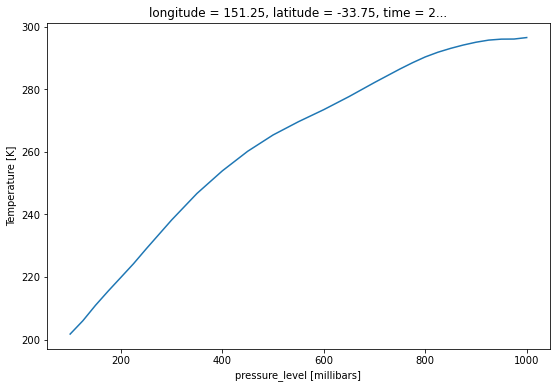

In [19]:
# If the dimensionality is reduced sufficiently, a line will be plotted.
# The below command reduces the dimension to 1 (level), against which 
# temp will be plotted.
temp.sel(level=slice(100, 1000), latitude=-33.75, longitude=151.25).plot(size=6)
# The plot shows an increase in temperature with increased pressure 
# level (decreasing altitude) as expected.

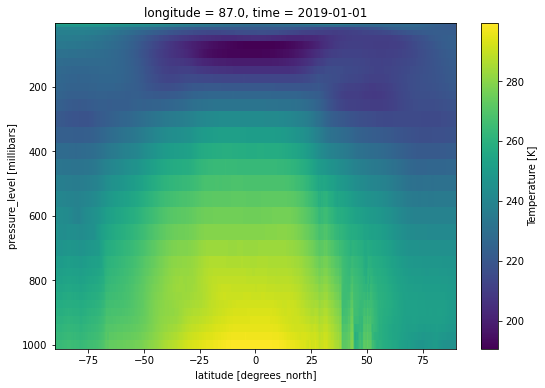

In [20]:
# We can also make altitude plots and see topographic profiles such 
# as the Himalayas!
temp.sel(longitude=86.93, method='nearest').plot(size=6, yincrease=False)

In [21]:
# CALCULATING METRICS
# This commands calculates the mean temperature along all dimensions.
temp.mean()

<xarray.DataArray 't' ()>
array(246.94084, dtype=float32)

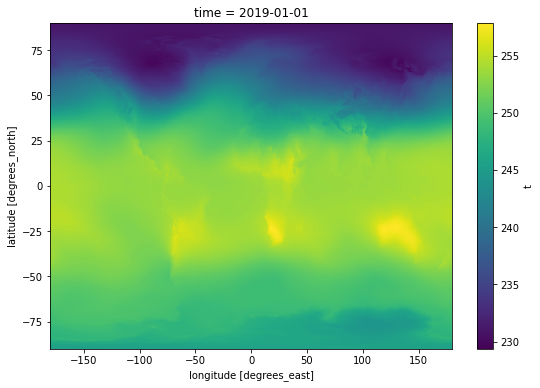

In [22]:
# We can also calculate temperature in latitude/longitude averaged 
# over height.
temp.mean(dim='level').plot(size=6)

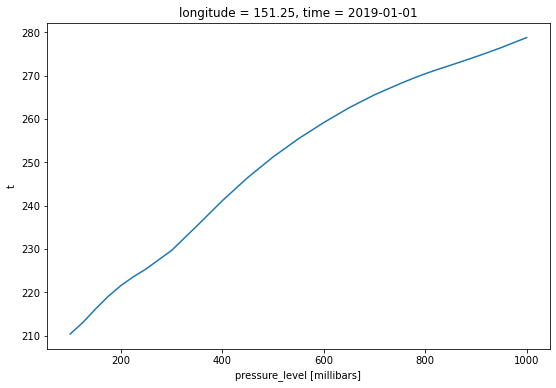

In [23]:
# Similarly, by making the correct slices (lat/lon), we could compute the
# average latitudinal temperature over all of Eastern Australia.
temp.sel(longitude=151.25, level=slice(100,1000)).mean(dim='latitude').plot(size=6)
# Note that if we extracted files over several years, we could calculate
# 30 year climatology by taking the mean('time') over a 30 year slice
# and plot the result.
# My calculation of the climatology requires the opening of a multi-file
# dataset.

In [24]:
# Once the climatology is calculated, we can calculate the anomaly 
# as demonstrated in w40.
# xarray checks the dimensions of different data, and broadcasts (repeats)
# the averaged value (climatology) over its missing time dimension.

# slice can be set to have no upper or lower limit by replacing the 
# argument with 'None'.

# NOTE: Calculate the worldwide mean by taking the anomaly over the years
# and averaging in latitude and longitude.

In [25]:
# Climatology and anomaly calculations
# Access files for climatology calculation.
from glob import glob
files = glob('/g/data/rt52/era5/pressure-levels/monthly-averaged/t/*/*')
files.sort()
era_all = xr.open_mfdataset(files, combine='by_coords')
#era_all = xr.open_mfdataset(files)
era_all

,Array,Chunk
Bytes,76.98 GB,153.66 MB
Shape,"(501, 37, 721, 1440)","(1, 37, 721, 1440)"
Count,1503 Tasks,501 Chunks
Type,float32,numpy.ndarray


In [26]:
# Calculate the climatology by taking the time average of the past 30
# years.
#era_clim_30 = era_all.sel(time=slice('1990-01-01' ,None)).groupby('time.month').mean()
era_clim_30 = era_all.sel(time=slice('1990-01-01' ,None)).groupby('time.month').mean()

In [27]:
#era_all_30 = era_all.sel(time=slice('1990-01-01' ,None)).groupby('time.month')

era_all_30 = era_all.sel(time=slice('1990-01-01' ,None))

In [28]:
era_all_30

,Array,Chunk
Bytes,56.70 GB,153.66 MB
Shape,"(369, 37, 721, 1440)","(1, 37, 721, 1440)"
Count,1872 Tasks,369 Chunks
Type,float32,numpy.ndarray


In [29]:

era_clim_30

<xarray.Dataset>
Dimensions:    (latitude: 721, level: 37, longitude: 1440, month: 12)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.75 -179.5 ... 179.25 179.5 179.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    t          (month, level, latitude, longitude) float32 dask.array<chunksize=(1, 37, 721, 1440), meta=np.ndarray>

In [30]:
era_all_30_grouped = era_all_30.groupby('time.month')

In [31]:
#ra_all_30_grouped.Dataset

In [32]:
# Calculate the anomaly by taking the difference between each month in 
# era_all since 1990 compared to the climatology.
#era_anom = era_all.sel(time=slice('1990-01-01' ,'2019-12-31')).groupby('time.month')-era_clim_30
era_anom_30 = era_all_30_grouped-era_clim_30
era_anom_30

,Array,Chunk
Bytes,56.70 GB,153.66 MB
Shape,"(369, 37, 721, 1440)","(1, 37, 721, 1440)"
Count,3897 Tasks,369 Chunks
Type,float32,numpy.ndarray


In [ ]:

# Calculate the anomaly.
#era_anom = temp.isel(time=0)-era_clim_30.t
# Plot the average anomaly over latitude and longitude.
#era_anom.sel(time=slice('1990-01-01', '2019-12-31')).mean(dim=('latitude', 'longitude')).plot(size=6)

# BEFORE PRINTING, plot all values

era_anom_30.t.sel(level=1000).mean(dim='latitude').mean(dim='longitude').values

#era_anom_30.t.mean(dim='latitude').mean(dim='longitude').plot(size=6)
#era_anom.t.mean(dim=('latitude', 'longitude')).plot(size=5)

In [ ]:
# NOTE! FINISH COMPUTING ABOVE ONCE OTHER TUTORIALS ARE COMPLETE.

In [ ]:
# GROUPING AND RESAMPLING
